In [1]:
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: ylabel='Count'>

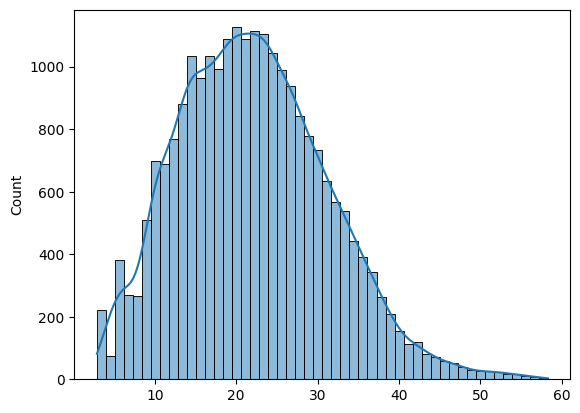

In [2]:
data = sp.io.loadmat("coord1PHP.mat")
protdist = data["protdist"][:, 0]
A = data["A"]
coord = data["coord"]
Nnode = A.shape[0]

sns.histplot(protdist, kde=True, bins=50)


/tmp/ipykernel_1019/2899854611.py:2: RuntimeWarning: divide by zero encountered in divide
  sns.heatmap(1./D)


<Axes: >

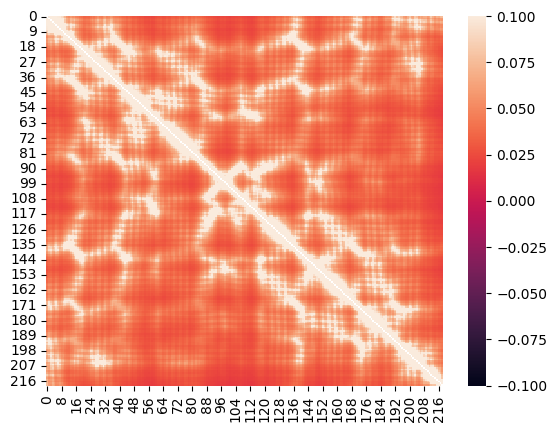

In [3]:
D = sp.spatial.distance.squareform(protdist)
sns.heatmap(1.0 / D)


<Axes: >

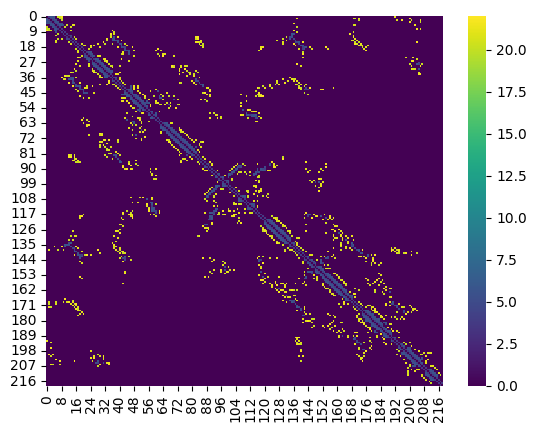

In [4]:
Net6 = (D < 6) * D
Net10 = (D > 10) * (D < 11) * D
N1 = (D < 11) * D
sns.heatmap(Net6 + 2 * Net10, cmap="viridis")


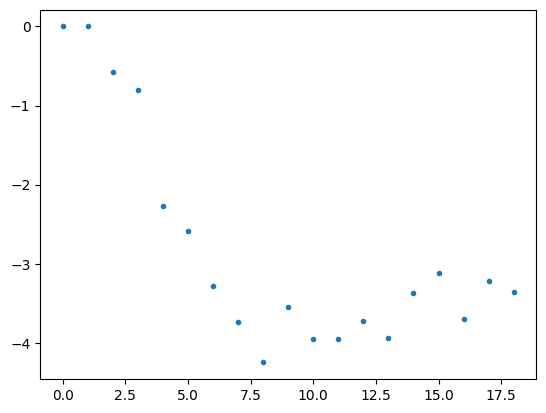

In [5]:
Kdiag = []

for index in range(Nnode):
    Kdiag.append(np.sum(np.diag(A, index)) / (Nnode - index))

plt.plot(np.log(Kdiag[1:20]), ".")


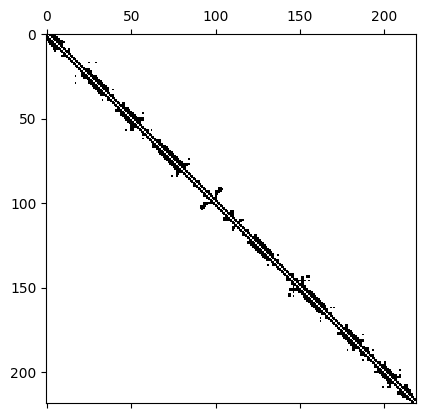

In [6]:
Nkd = 12
Ad = np.zeros((Nnode, Nnode), dtype=int)

for ind in range(-Nkd, Nkd + 1):
    Ad += np.diagflat(A.diagonal(ind), ind)

plt.spy(Ad)


<Axes: >

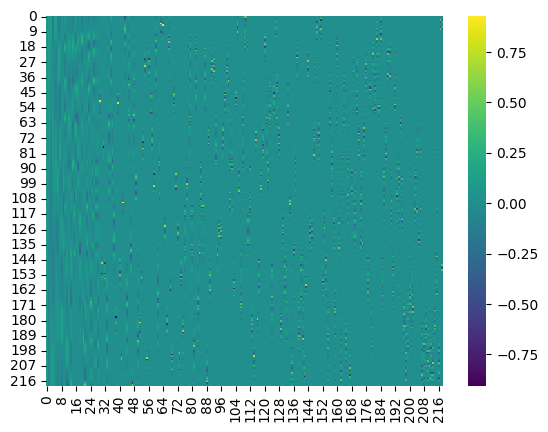

In [7]:
ValAd, VecAd = np.linalg.eig(sp.sparse.csgraph.laplacian(Ad))
sns.heatmap(VecAd, cmap="viridis")


We can clearly see that the components of the last eigenvectors are almost all zero and the non-zero ones are tiny and sparse.

<Axes: >

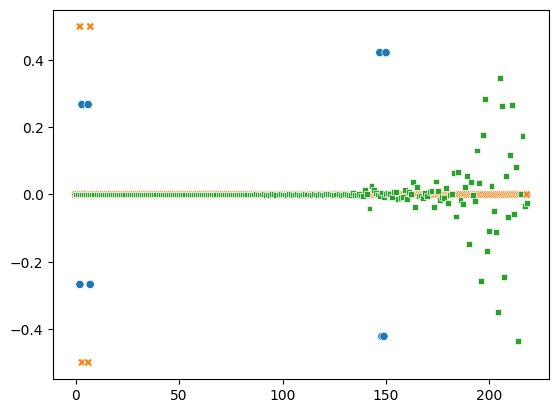

In [47]:
i1 = Nnode - 1
i2 = Nnode - 2
i3 = Nnode - 3
sns.scatterplot(VecAd[:, [i1, i2, i3]], legend=False)


On the other hand, plotting the first three eigenvalues we notice how continuous and far from zero their components are.
So, the more we look at eigenvectors with small eigenvalues, the more we lose *smoothness*.

<Axes: >

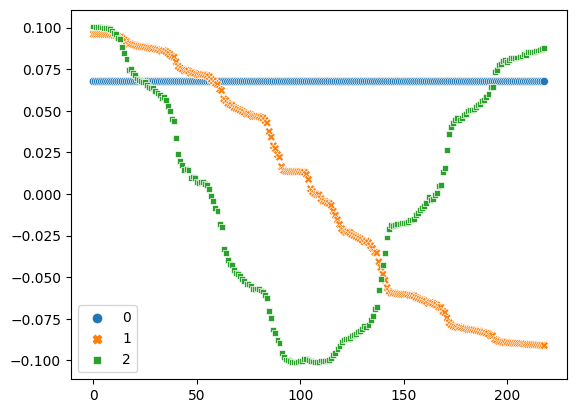

In [15]:
sns.scatterplot(VecAd[:, [0, 1, 2]])


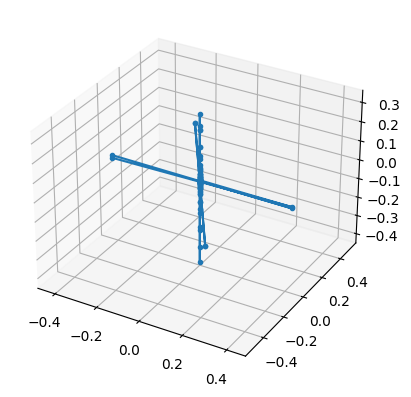

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot3D(VecAd[:, i1], VecAd[:, i2], VecAd[:, i3], marker=".")


In [11]:
import networkx as nx

D, P = sp.sparse.csgraph.dijkstra(Ad, directed=False, return_predecessors=True)
Cl = 1 / np.mean(D)
K = np.sum(A, axis=0)
BC = nx.betweenness_centrality(nx.from_numpy_array(A))

print(Cl)
print(np.mean(K))
print(BC)


0.057588259732525154
10.0
{0: 0.0, 1: 0.01204099367300543, 2: 0.01401334954164753, 3: 0.0006162970922864942, 4: 0.003207949937519427, 5: 0.004760302926528808, 6: 0.015745067857777278, 7: 0.00021252745606001165, 8: 0.00021175435907414559, 9: 0.018880116457933395, 10: 0.00888257472519769, 11: 0.0023694854983744664, 12: 0.0094880906468599, 13: 0.02933047382010951, 14: 0.03252025074991718, 15: 0.030695451217927962, 16: 0.038462364866308704, 17: 0.08435553124496131, 18: 0.024875777266538317, 19: 0.01898044341253277, 20: 0.012672017990833909, 21: 0.03203780430616507, 22: 0.020321735104592082, 23: 0.002593975616196208, 24: 0.006316049722693714, 25: 0.035867958406912044, 26: 0.00886974262256941, 27: 0.018539458858847696, 28: 0.029567403288930073, 29: 0.05102375663848864, 30: 0.013992145898055398, 31: 0.021094277586248687, 32: 0.022239208860012256, 33: 0.026374887834566138, 34: 0.0026377886461965614, 35: 0.01576424530824187, 36: 0.01584612667926236, 37: 0.013458710054482643, 38: 0.0200079095127